# Short Assignment 2

## Problem 2

In this problem you will be working with the **Boston Housing Prices Data Set**. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are defined as follows:

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
data = load_boston(return_X_y=False)

print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The goal of this assignment is to design a **Linear Regression model** that predicts the median value of owner-occupied homes (value in \$1,000s) using the attributes for each sample.

To simplify this problem, the line below creates a ```pandas``` dataframe with all the attributes and target value:

In [3]:
# df - dataframe
df = pd.DataFrame(np.hstack((data.data,data.target[:,np.newaxis])),
                  columns=np.hstack((data.feature_names,['House Value'])))
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Use this ```pandas``` dataframe to access the appropriate data entries to solve the following problems:

1. Using ```pandas``` methods do:
    * Print a [correlation matrix](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) and comment on each feature's predictive value
    * [Plot the ```scatter_matrix```](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) for each pair of variables. This may aid your analysis in step 1.
    * Based on these measures, provide a paragraph description about which features have higher predictive value? You can use Pearson's correlation coefficient as a measure of predictive value. Justify your answer.
    * Choose the top feature with largest predictive value. Justify your answer.

In [4]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Value
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


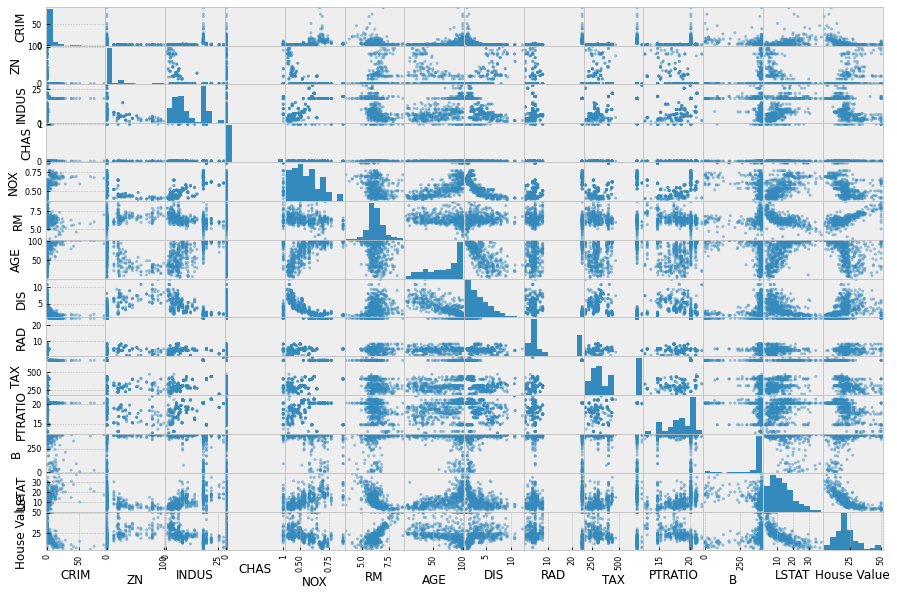

In [5]:
pd.plotting.scatter_matrix(df, figsize=(15,10));

We are interested in selecting the features that have high predictive value. In the Pearson's correlation sense, those features are such that the (absolute) correlation value is very high with the target output "House value".

At the same time, we want features to carry *unique* information, therefore, we are looking for those features that are not highly correlated with one another, as information of one is partially included in the other.

**Predictive value**

In [6]:
df.corr()['House Value']

CRIM          -0.388305
ZN             0.360445
INDUS         -0.483725
CHAS           0.175260
NOX           -0.427321
RM             0.695360
AGE           -0.376955
DIS            0.249929
RAD           -0.381626
TAX           -0.468536
PTRATIO       -0.507787
B              0.333461
LSTAT         -0.737663
House Value    1.000000
Name: House Value, dtype: float64

The features: RM (average number of rooms per dwelling) and LSTAT (\% lower status of the population) have a $|r| > 0.6$ and so they carry a high predictive value in their linear relationship with the target "House Value".

In [7]:
df.corr()[['RM','LSTAT']]

,RM,LSTAT
CRIM,-0.219247,0.455621
ZN,0.311991,-0.412995
INDUS,-0.391676,0.603800
CHAS,0.091251,-0.053929
NOX,-0.302188,0.590879
RM,1.000000,-0.613808
AGE,-0.240265,0.602339
DIS,0.205246,-0.496996
RAD,-0.209847,0.488676
TAX,-0.292048,0.543993


However, RM is highly correlated with LSTAT ($r=-0.613808$). As such, both of these features carry the same information and become redundant.

As LSTAT has the largest Pearson's correlation coefficient in the absolute value, let's consider it the selected feature.

2. Normalize the selected feature using the scaling method. Let $x_1$ be one of the selected feature:

$$\hat{x_1} = \frac{x_1 - \min(x_1)}{\max(x_1) - \min(x_1)}$$

where $\max(x_1)$ is the maximum value of feature $x_1$ and $\min(x_1)$ is the minimum value of feature $x_1$.

In [8]:
x = df['LSTAT'].to_numpy()
t = df['House Value'].to_numpy()

x.shape, t.shape

((506,), (506,))

In [9]:
x_norm = (x-np.min(x,axis=0))/(np.max(x,axis=0) - np.min(x,axis=0))

x_norm.shape

(506,)

3. Implement a polynomial regression model using 4-fold cross-validation to select the best model order $M$. Use the coefficient of determination, $r^2$, as the goodness measure.

You should **not** use built-in functions to implement polynomial regression or cross-validation. But you can use help functions such as [```train_test_split```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data, [```linregress```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) to compute the coefficient of determination and [```KFold```](https://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.KFold.html) to split the training set in k-folds.

* partition the (scaled) data into training (80%) and test (20%) sets
* use 4-fold cross-validation to select a best value for model order $M$ from a pre-defined set
* train a final model with the *best* model order
* evaluate performance in the test set using the same goodness measure ($r^2$)
* draw conclusions

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from scipy.stats import linregress

In [11]:
X_train, X_test, t_train, t_test = train_test_split(x_norm, t, test_size=0.20)

In [12]:
def PolynomialRegression(x,t,M):
    X = np.array([x**m for m in range(M)]).T
    w = np.linalg.inv(X.T@X)@X.T@t
    y = X@w
    error = t-y
    return w, y, error

def PolynomialRegression_test(x,M,w):
    X = np.array([x**m for m in range(M)]).T 
    y = X@w
    return y

Note that when using the Least Squares objective function, we are assuming that the residuals are Gaussian-distributed:

Let $J(\mathbf{w}) = \frac{1}{2}\sum_{i=1}^N \left(t_i-y_i\right)^2 = \frac{1}{2}\sum_{i=1}^N e_i^2$, then:

\begin{align*}
&\arg_{\mathbf{w}}\min J(\mathbf{w})\\
\iff&\arg_{\mathbf{w}}\max \exp\left\{-J(\mathbf{w})\right\}\\
\iff&\arg_{\mathbf{w}}\max \exp\left\{-\frac{1}{2}\sum_{i=1}^N e_i^2\right\}\\
\propto&\arg_{\mathbf{w}}\max \mathcal{N}\left(0,1\right)\\
\end{align*}

That is, the least squares objective function, assumes that the residuals of this models are Normal-distributed (Gaussian with mean 0 and variance 1).

Therefore, we can use the r2-score of the Q-Q plot to test for Normality of the residuals. This will be our evaluation metric.

In code, to implement this, I will use [```scipy.stats.probplot```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) which computes the Q-Q plot of a set of residual errors against quantiles drawn from a Normal distribution (Gaussian with mean 0 and variance 1).

Now, we can implement 4-fold CV using the training data:

In [ ]:
from scipy.stats import probplot

# 4-fold cross validation to find the best Model Order M
kf = KFold(n_splits=4)
M_vals = np.arange(2,20,1)
max_r2 = 0
m_best = 0
r2_train_store=[]
r2_val_store=[]

for M in M_vals:
    # Initialize r2 score for validation data
    r2_val = 0
    # Initialize r2 score for training data
    r2_train = 0
    print('Model Order = ',M)
    f=1
    # For each training/validation split
    for train_index, validation_index in kf.split(X_train):
        print('Fold ',f)
        # Select training set
        x_train2, x_validation = X_train[train_index], X_train[validation_index]
        # Select validaiton set
        t_train2, t_validation = t_train[train_index], t_train[validation_index]
        # Training model with training set with order M
        w, pred_train, etrain = PolynomialRegression(x_train2, t_train2, M)
        # Evaluate trained model in validation set
        pred_val = PolynomialRegression_test(x_validation, M, w)
        # Compute the r-score from quantiles of prediction values for training
        _,LR_train = probplot(t_train2-pred_train);
        rtrain = LR_train[2]
        # Compute the r-score from quantiles of prediction values for validation
        _,LR_val = probplot(t_validation-pred_val);
        rval = LR_val[2]
        #add r2-score for current split in training
        r2_train+=rtrain**2
        #add r2-score for current split in validation
        r2_val+=rval**2
        # Alternatively, r2-score could be the r^2 of the linregress function
        # of the target values with the predicted values
        print('R-squared Training = ',rtrain**2)
        print('R-squared Validation = ',rval**2)
        print('-----------------------------------------------------')
        f+=1
    # Overall performane for training and validation as average performance
    r2_train_store+=[r2_train/4]
    r2_val_store+=[r2_val/4]
    print('Average Training = ', r2_train/4, '\n Average Validation = ', r2_val/4)
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    # Select model order with largest r2-score
    if r2_val > max_r2:
        m_best = M
        max_r2 = r2_val

In [14]:
print('The model order M chosen is ' + str(m_best) + ', with an average r2 score of ' + str(max_r2 / 4))

The model order M chosen is 4, with an average r2 score of 0.9122137288713205


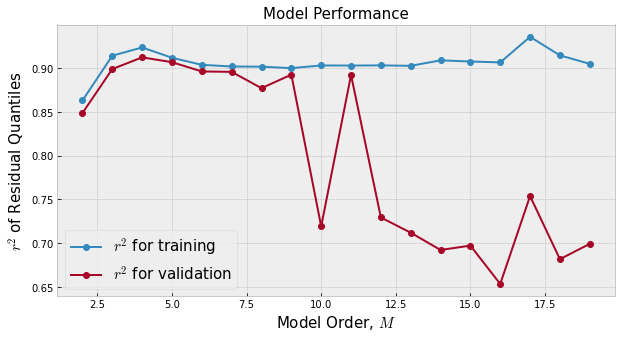

In [15]:
plt.figure(figsize=(10,5))
plt.plot(M_vals,r2_train_store,'-o',label='$r^2$ for training')
plt.plot(M_vals,r2_val_store,'-o',label='$r^2$ for validation')
plt.legend(fontsize=15)
plt.xlabel('Model Order, $M$',size=15)
plt.ylabel('$r^2$ of Residual Quantiles',size=15)
plt.title('Model Performance',size=15);

The best model order is $M=4$.

**Note that if you run this code multiple times, new partitions will be selected, therefore the optimal $M$ value may differ.**

Let's retrain the final model using the entire training data:

In [16]:
w_final,pred_train,_ = PolynomialRegression(X_train,t_train,m_best)

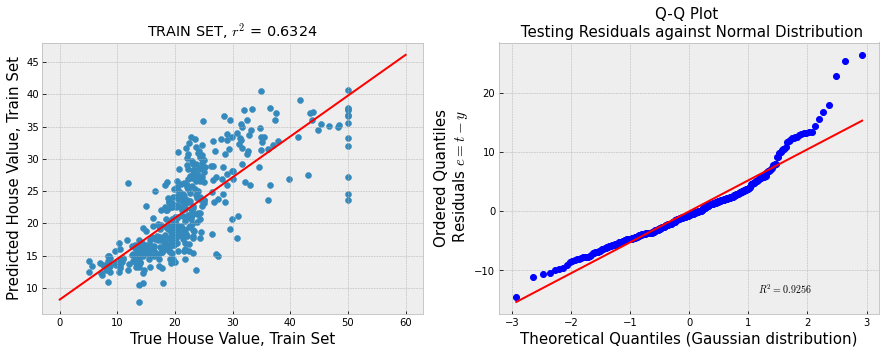

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
m,b,_,_,_=linregress(t_train,pred_train)
plt.plot(np.linspace(0,60,100),np.linspace(0,60,100)*m+b,'r')
plt.scatter(t_train,pred_train)
plt.xlabel('True House Value, Train Set',fontsize=15)
plt.ylabel('Predicted House Value, Train Set',fontsize=15)
plt.title('TRAIN SET, $r^2$ = '+
          str(np.round(linregress(t_train,pred_train)[2]**2,4)));

plt.subplot(1,2,2)
probplot(t_train-pred_train, plot=plt, rvalue=True)
plt.title('Q-Q Plot \n Testing Residuals against Normal Distribution',size=15)
plt.xlabel('Theoretical Quantiles (Gaussian distribution)',size=15)
plt.ylabel('Ordered Quantiles\n Residuals $e=t-y$',size=15);

And now evaluate performance on the test set:

In [18]:
pred_test = PolynomialRegression_test(X_test, m_best, w_final)

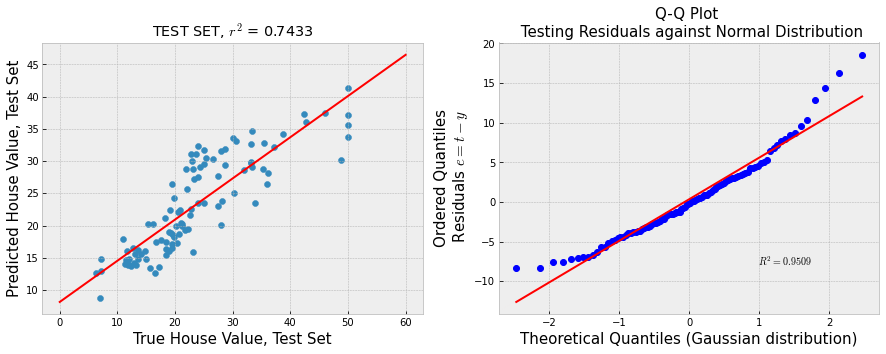

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
m,b,_,_,_=linregress(t_test,pred_test)
plt.plot(np.linspace(0,60,100),np.linspace(0,60,100)*m+b,'r')
plt.scatter(t_test,pred_test)
plt.xlabel('True House Value, Test Set',fontsize=15)
plt.ylabel('Predicted House Value, Test Set',fontsize=15)
plt.title('TEST SET, $r^2$ = '+
          str(np.round(linregress(t_test,pred_test)[2]**2,4)))

plt.subplot(1,2,2)
probplot(t_test-pred_test, plot=plt, rvalue=True)
plt.title('Q-Q Plot \n Testing Residuals against Normal Distribution',size=15)
plt.xlabel('Theoretical Quantiles (Gaussian distribution)',size=15)
plt.ylabel('Ordered Quantiles\n Residuals $e=t-y$',size=15);

During training, the r2-score for the residual quantiles is approximately 92.56% and the r2-score for the residual quantiles in the testing stage is approximately 95.09%. This indicates that the model is generalizing for new and unknown samples.

But the overall performance is much less than the desired $r^2>>99\%$. This is visually seen in the Q-Q plots: the tails of the distribution do now fit the normality assumption for the residuals very well. This model architecture (linear regression) may be too simple.